VaR is the minimum loss which will be incurred at a certain level of probability (confidence interval) OR the maximum loss which will be realized at a level of probability.

<img src="https://miro.medium.com/max/500/1*vX_S15rz5sLHSZhRX9HR6w.jpeg" >

The above image shows the maximum loss which can be faced by a company at alfa % confidence.

In [3]:
#Importing all required libraries
#Created by Sanket Karve
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import FuncFormatter
!pip install PyPortfolioOpt
#Installing the Portfolio Optimzation Library
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from matplotlib.ticker import FuncFormatter

     |████████████████████████████████| 60 kB 260 kB/s eta 0:00:011
     |████████████████████████████████| 1.3 MB 177 kB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Using cached osqp-0.6.2.post0-cp37-cp37m-manylinux2014_x86_64.whl (212 kB)
  Using cached ecos-2.0.7.post1-cp37-cp37m-manylinux1_x86_64.whl (147 kB)
     |████████████████████████████████| 6.6 MB 363 kB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Using cached qdldl-0.1.5.post0-cp37-cp37m-manylinux2014_x86_64.whl (941 kB)
  Created wheel for cvxpy: filename=cvxpy-1.1.13-cp37-cp37m-linux_x86_64.whl size=2736255 sha256=a4e05896f4f575df05669331295031a344d1c927a870e9e363597e278a1223f2
  Stored in directory: /home/german/.cache/pip/wheels/75/f2/f8/d594ef1abb01187c33dcc6c9bcf6cf3474ec01535ed9b75e3a
  Created wheel for scs: filename=scs-2

In [4]:
import pandas as pd
import yfinance as yf
def download_ticker(ticker):
    data_= yf.download(tickers = ticker,
                        start="2017-01-01",
                        #end="2017-12-31",
                        interval = "1d",
                        auto_ajust = True,
                        threads = True,
                           )
    #display(data_["Adj Close"])
    return data_["Adj Close"]

In [6]:
tickers = ['GOOGL','FB','AAPL','NFLX','AMZN']
thelen = len(tickers)
price_data = []
for ticker in range(thelen):
    price_data.append(download_ticker(tickers[ticker]))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [7]:
df_stocks = pd.concat(price_data, axis=1)
df_stocks.columns=tickers
df_stocks.tail()

,GOOGL,FB,AAPL,NFLX,AMZN
Date,,,,,
2021-07-01,2448.889893,354.390015,137.270004,533.539978,3432.969971
2021-07-02,2505.149902,354.700012,139.960007,533.979980,3510.979980
2021-07-06,2523.800049,352.779999,142.020004,541.640015,3675.739990
2021-07-07,2529.479980,350.489990,144.570007,535.960022,3696.580078
2021-07-08,2500.879883,345.649994,143.240005,530.760010,3731.409912


Now we will calculate the portfolio weights of each assets. 


In [8]:
#Annualized Return
mu = expected_returns.mean_historical_return(df_stocks)
#Sample Variance of Portfolio
Sigma = risk_models.sample_cov(df_stocks)
#Max Sharpe Ratio - Tangent to the EF
from pypfopt import objective_functions, base_optimizer
ef = EfficientFrontier(mu, Sigma, weight_bounds=(0,1)) #weight bounds in negative allows shorting of stocks
sharpe_pfolio=ef.max_sharpe() 
#May use add objective to ensure minimum zero weighting to individual stocks
sharpe_pwt=ef.clean_weights()
print(sharpe_pwt)

OrderedDict([('GOOGL', 0.0), ('FB', 0.0), ('AAPL', 0.49048), ('NFLX', 0.0), ('AMZN', 0.50952)])


Now we have the weights of Max Sharpe Ratio by optimizacion.
This this we will used to calculate the expected portfolio return.

In [9]:
#VaR Calculation

In [10]:

ticker_rx2 = []
#Convert Dictionary to list of asset weights from Max Sharpe Ratio Portfolio
sh_wt = list(sharpe_pwt.values())
sh_wt=np.array(sh_wt)

In [11]:
# we convert price to cummulative return, also we considered this as holding period

In [12]:
for a in range(thelen):
    ticker_rx = df_stocks[[tickers[a]]].pct_change()
    ticker_rx = (ticker_rx+1).cumprod()
    ticker_rx2.append(ticker_rx[[tickers[a]]])
ticker_final = pd.concat(ticker_rx2,axis=1)
ticker_final

,GOOGL,FB,AAPL,NFLX,AMZN
Date,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN
2017-01-04,0.999703,1.015660,0.998881,1.015060,1.004657
2017-01-05,1.006200,1.032603,1.003961,1.033885,1.035533
2017-01-06,1.021287,1.056050,1.015153,1.028081,1.056152
2017-01-09,1.023725,1.068800,1.024451,1.027139,1.057386
...,...,...,...,...,...
2021-07-01,3.030767,3.032603,5.007410,4.184956,4.555004
2021-07-02,3.100395,3.035256,5.105538,4.188407,4.658511
2021-07-06,3.123476,3.018826,5.180684,4.248490,4.877121


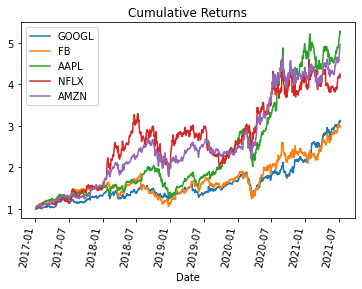

In [14]:
#Plot graph of Cumulative/HPR of all stocks
for i, col in enumerate(ticker_final.columns):
    ticker_final[col].plot()
plt.title('Cumulative Returns')
plt.xticks(rotation=80)
plt.legend(ticker_final.columns)
#Saving the graph into a JPG file
plt.savefig('CR.png', bbox_inches='tight')

In [25]:
ticker_final.tail()

,GOOGL,FB,AAPL,NFLX,AMZN
Date,,,,,
2021-07-01,3.030767,3.032603,5.007410,4.184956,4.555004
2021-07-02,3.100395,3.035256,5.105538,4.188407,4.658511
2021-07-06,3.123476,3.018826,5.180684,4.248490,4.877121
2021-07-07,3.130506,2.999230,5.273704,4.203938,4.904773
2021-07-08,3.095110,2.957813,5.225187,4.163150,4.950987


In [26]:
df_stocks.tail()

,GOOGL,FB,AAPL,NFLX,AMZN
Date,,,,,
2021-07-01,2448.889893,354.390015,137.270004,533.539978,3432.969971
2021-07-02,2505.149902,354.700012,139.960007,533.979980,3510.979980
2021-07-06,2523.800049,352.779999,142.020004,541.640015,3675.739990
2021-07-07,2529.479980,350.489990,144.570007,535.960022,3696.580078
2021-07-08,2500.879883,345.649994,143.240005,530.760010,3731.409912


In [45]:
#Taking Latest Values of Return
pret = [] # RETURNS
pre1 = []
price =[] # PRICES
for x in range(thelen):
    pret.append(ticker_final.iloc[[-1],[x]])
    price.append((df_stocks.iloc[[-1],[x]]))

In [46]:
pret,price

([              GOOGL
  Date               
  2021-07-08  3.09511,
                    FB
  Date                
  2021-07-08  2.957813,
                  AAPL
  Date                
  2021-07-08  5.225187,
                 NFLX
  Date               
  2021-07-08  4.16315,
                  AMZN
  Date                
  2021-07-08  4.950987],
 [                  GOOGL
  Date                   
  2021-07-08  2500.879883,
                      FB
  Date                  
  2021-07-08  345.649994,
                    AAPL
  Date                  
  2021-07-08  143.240005,
                   NFLX
  Date                 
  2021-07-08  530.76001,
                     AMZN
  Date                   
  2021-07-08  3731.409912])

In [47]:
pre1 = pd.concat(pret,axis=1)
display(pre1) # commulative returns each stock
pre1 = np.array(pre1)

,GOOGL,FB,AAPL,NFLX,AMZN
Date,,,,,
2021-07-08,3.09511,2.957813,5.225187,4.16315,4.950987


In [48]:

price = pd.concat(price,axis=1)
price

,GOOGL,FB,AAPL,NFLX,AMZN
Date,,,,,
2021-07-08,2500.879883,345.649994,143.240005,530.76001,3731.409912


In [49]:
varsigma = pre1.std() # calculo la volatilidad que hay de cada stock del portfolio del ultimo dia
varsigma

0.9280394538860985

In [50]:
sh_wt

array([0.     , 0.     , 0.49048, 0.     , 0.50952])

In [51]:

ex_rtn=pre1.dot(sh_wt) # last-day cummulative returns * weights_sharpe_ratio portfolio
print('The weighted expected portfolio return for selected time period is'+ str(ex_rtn))
#ex_rtn = (ex_rtn)**0.5-(1) #Annualizing the cumulative return (will not affect outcome)
price=price.dot(sh_wt) #Calculating weighted value | PRICES * weights
print(ex_rtn)
print(varsigma)
print(price) 

The weighted expected portfolio return for selected time period is[5.08547655]
[5.08547655]
0.9280394538860985
Date
2021-07-08    1971.484336
dtype: float64


Having calculated the expected portfolio return and the volatility (standard deviation of the expected returns), we will set up and run the Monte Carlo simulation

In [57]:
np.random.normal(3, 2.5, size=1400)

array([ 3.85906856,  2.22435003,  3.2954236 , ..., -1.675286  ,
        5.61201713,  1.18055004])

Aca vemos un ejemplo de como generar retornos intraday. 1400 minutos tiene 24 horas.
Entonces generamos retornos basada en una distribucion normal 

array([ 0.01949095, -0.01770774,  0.02793846, ..., -0.01238096,
        0.00279492,  0.0597263 ])

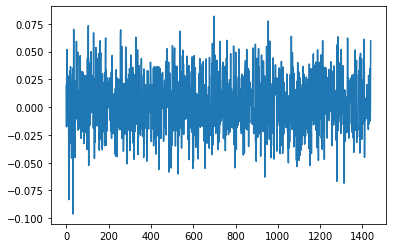

In [91]:
def generate_returns_intraday():
    #varsigma = volatilidad de todos los stocks
    # loc es el promedio de retornos
    daily_returns=(np.random.normal(loc=ex_rtn/Time,scale=varsigma/math.sqrt(Time),size=Time))
    plt.plot(daily_returns)
    return daily_returns
generate_returns_intraday()

In [84]:
varsigma

0.9280394538860985

In [83]:
varsigma/math.sqrt(Time)

0.024455986939823936

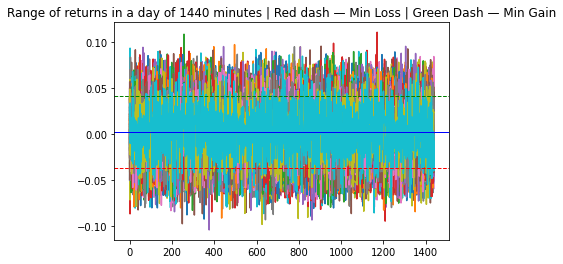

In [67]:
from scipy.stats import norm
import math
Time=1440 # 1440 MINUTES - No of days(steps or trading days in this case)
lt_price=[]
final_res=[]
for i in range(100): #10000 runs of simulation
    daily_return=(np.random.normal(loc=ex_rtn/Time,scale=varsigma/math.sqrt(Time),size=Time))
    final_res.append(daily_return)
    plt.plot(daily_return)
plt.axhline(np.percentile(daily_returns,5), color='r', linestyle='dashed', linewidth=1)
plt.axhline(np.percentile(daily_returns,95), color='g', linestyle='dashed', linewidth=1)
plt.axhline(np.mean(daily_returns), color='b', linestyle='solid', linewidth=1)
plt.title("Range of returns in a day of 1440 minutes | Red dash — Min Loss | Green Dash — Min Gain")
plt.show()

In [76]:
daily_returns=np.concatenate(final_res)
print("En total tenemos",len(daily_returns),"retornos extraidos de N simulaciones")

En total tenemos 144000 retornos extraidos de N simulaciones


Visualizing the distribution plot of the returns presents us with the following chart

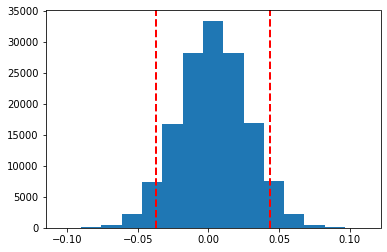

In [77]:
plt.hist(daily_returns,bins=15)
plt.axvline(np.percentile(daily_returns,5), color='r', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(daily_returns,95), color='r', linestyle='dashed', linewidth=2)
plt.show()

In [82]:
print(np.percentile(daily_returns,5),np.percentile(daily_returns,95)) #VaR - 
portfolio_value = 100000 #portfolio value
print("Your portfolio is",portfolio_value)
print('$Amount required to cover minimum losses for one day is USD ' + str(round(portfolio_value* - np.percentile(daily_returns,5),3)))

-0.03675595029857778 0.04357768994726397
Your portfolio is 100000
$Amount required to cover minimum losses for one day is USD 3675.595


The resulting amount will signify the dollar amount required to cover your losses per day. The result can also be interpreted as the minimum losses that your portfolio will face with a 5% probability.